In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train_knight = pd.read_csv('./Knights/Train_knight.csv')
df_test_knight = pd.read_csv('./Knights/Test_knight.csv')
df_valid_knight = pd.read_csv('./Knights/Validation_knight.csv')

  Class  Precision  Recall  F1-Score  total
0  Jedi       0.45    0.51      0.48     49
1  Sith       0.47    0.41      0.44     51
accuracy 0.46 100
[[25 24]
 [30 21]]


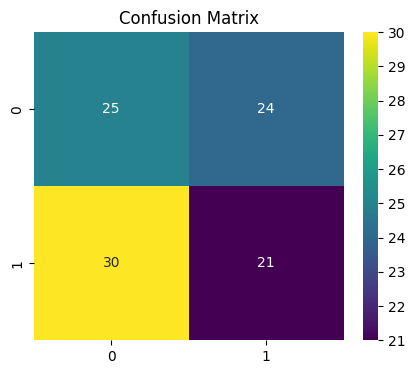

In [3]:


ground_truth = np.loadtxt('truth.txt', dtype=str)
predictions = np.loadtxt('predictions.txt', dtype=str)

positive = 'Sith'
negative = 'Jedi'

# Compute confusion matrix
TP = sum((t == positive and p == positive) for t, p in zip(ground_truth, predictions))
TN = sum((t == negative and p == negative) for t, p in zip(ground_truth, predictions))
FP = sum((t == negative and p == positive) for t, p in zip(ground_truth, predictions))
FN = sum((t == positive and p == negative) for t, p in zip(ground_truth, predictions))

# Compute printing calculations
Precision_1 = TN / (TN + FN)
Recall_1 = TN / (TN + FP)
F1_1 = 2 * (Precision_1 * Recall_1) / (Precision_1 + Recall_1)
total_1 = sum(ground_truth == negative)

Precision_2 = TP / (TP + FP)
Recall_2 = TP / (TP + FN)
F1_2 = 2 * (Precision_2 * Recall_2) / (Precision_2 + Recall_2)
total_2 = sum(ground_truth == positive)

Accuracy = (TP + TN) / (TP + FP + FN + TN)
total_3 = total_1 + total_2
data = {
    'Class': [negative, positive],
    'Precision': [Precision_1, Precision_2],
    'Recall': [Recall_1, Recall_2],
    'F1-Score': [F1_1, F1_2],
    'total': [total_1, total_2]
}

df = pd.DataFrame(data)
print(df.round(2))
print('accuracy', Accuracy, total_3)

# Format into a 2x2 matrix
conf_matrix = np.array([[TN, FP],
                        [FN, TP]])
print(conf_matrix)

# Display matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.show()


               Sensitivity  Hability  Strength     Power   Agility  Dexterity  \
Sensitivity       1.000000  0.337556  0.997842  0.986120  0.171059   0.506158   
Hability          0.337556  1.000000  0.348377  0.331831  0.057664   0.315342   
Strength          0.997842  0.348377  1.000000  0.984738  0.207609   0.557390   
Power             0.986120  0.331831  0.984738  1.000000  0.173705   0.486935   
Agility           0.171059  0.057664  0.207609  0.173705  1.000000   0.649070   
Dexterity         0.506158  0.315342  0.557390  0.486935  0.649070   1.000000   
Awareness         0.658587  0.355403  0.698516  0.665253  0.529327   0.881299   
Prescience        0.816778  0.350980  0.845548  0.811245  0.567710   0.833358   
Reactivity        0.168508  0.108389  0.202454  0.167166  0.547530   0.594439   
Midi-chlorien    -0.340942 -0.018188 -0.290692 -0.319333  0.567478   0.537572   
Slash             0.669688  0.270062  0.681545  0.728493  0.308426   0.476347   
Push             -0.104644  

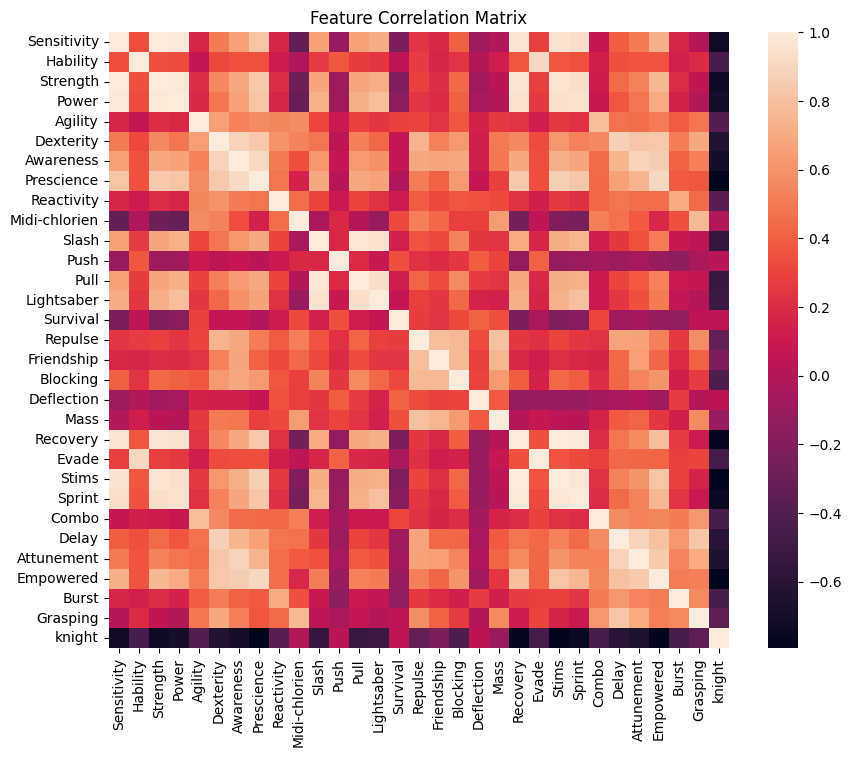

In [4]:
from sklearn.preprocessing import StandardScaler

# Load and prepare data
pd.set_option('display.max_columns', None)
df = df_train_knight.copy()

# Encode target variable
df['knight'] = df['knight'].map({'Jedi': 0, 'Sith': 1})

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# Compute and visualize correlation matrix
correlations = X_scaled_df.corr()

print(correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap='rocket', annot=False, xticklabels=numeric_cols, yticklabels=numeric_cols)
plt.title("Feature Correlation Matrix")
plt.show()


Variances (Percentage):
 [4.48917596e+01 1.77912636e+01 9.67060568e+00 6.26842269e+00
 5.37204836e+00 3.73955136e+00 2.37591979e+00 1.82012117e+00
 1.38767075e+00 1.10970484e+00 1.02059677e+00 9.21235938e-01
 8.52230799e-01 7.13562872e-01 4.13084765e-01 3.04511906e-01
 2.71586688e-01 2.15161303e-01 1.85399684e-01 1.48042429e-01
 1.08631716e-01 1.04241449e-01 8.00248252e-02 7.60452896e-02
 5.50959514e-02 4.97445867e-02 2.57925354e-02 1.98906888e-02
 5.51592381e-03 2.16800508e-03 3.68038524e-04]
Cumulative Variances (Percentage):
 [ 44.89175956  62.68302319  72.35362887  78.62205156  83.99409992
  87.73365129  90.10957108  91.92969224  93.317363    94.42706783
  95.44766461  96.36890054  97.22113134  97.93469422  98.34777898
  98.65229089  98.92387757  99.13903888  99.32443856  99.47248099
  99.58111271  99.68535416  99.76537898  99.84142427  99.89652022
  99.94626481  99.97205734  99.99194803  99.99746396  99.99963196
 100.        ]


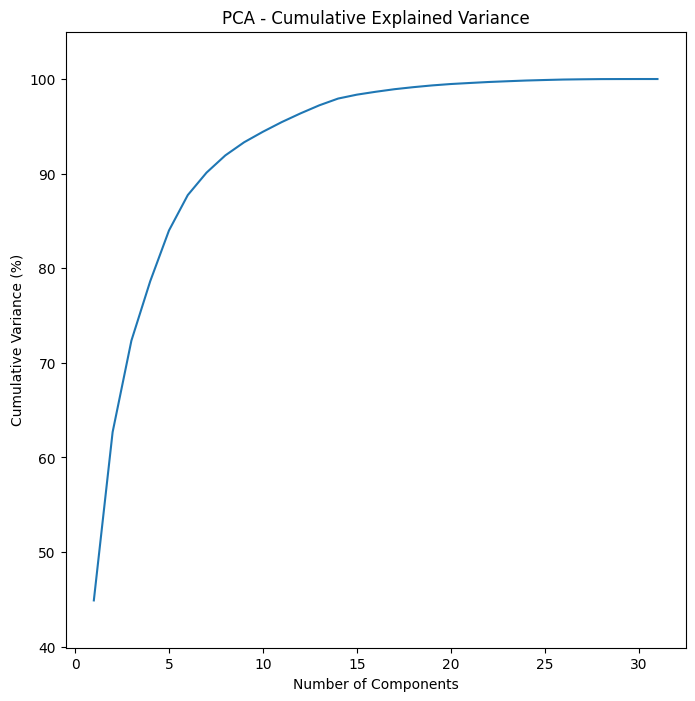

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
df = df_train_knight.copy()

# Encode target if needed
df['knight'] = df['knight'].map({'Jedi': 1, 'Sith': 0})

# Select only numeric features
numeric_df = df.select_dtypes(include='number')

# Scale features to 0–1 range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Get explained variance
explained_var = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_ratio.cumsum()

# Convert to DataFrame
pca_df = pd.DataFrame({
    'Component': range(1, len(explained_var)+1),
    'Explained Variance': explained_var,
    'Explained Variance Ratio (%)': explained_ratio * 100,
    'Cumulative Variance (%)': cumulative_variance * 100
})

# Print example values
print('Variances (Percentage):\r\n', pca_df['Explained Variance Ratio (%)'].to_numpy())
print('Cumulative Variances (Percentage):\r\n', pca_df['Cumulative Variance (%)'].to_numpy())

# Plot cumulative explained variance
plt.figure(figsize=(8, 8))
plt.plot(pca_df['Component'], pca_df['Cumulative Variance (%)'], marker='')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.title('PCA - Cumulative Explained Variance')
plt.ylim(min(pca_df['Cumulative Variance (%)']) - 5, 100 + 5)
plt.show()


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example dataframe
df = df_train_knight.copy()

# Encode target if needed
df['knight'] = df['knight'].map({'Jedi': 1, 'Sith': 0})

# Select only numeric features
numeric_df = df.select_dtypes(include='number')

# Add constant (intercept) term
X = add_constant(numeric_df)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data[""] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data.to_string(index=False))

#Check for practical values
filtered_values = vif_data[vif_data['VIF'] < 5]
print(filtered_values.to_string(index=False))





                      VIF  Tolerance
        const 2233.829330   0.000448
  Sensitivity 4405.611729   0.000227
     Hability   11.315560   0.088374
     Strength 4507.502279   0.000222
        Power  415.206742   0.002408
      Agility    7.658262   0.130578
    Dexterity   54.742161   0.018267
    Awareness   70.187104   0.014248
   Prescience   54.807121   0.018246
   Reactivity    4.074263   0.245443
Midi-chlorien   14.678468   0.068127
        Slash   81.359476   0.012291
         Push    4.076030   0.245337
         Pull   74.078367   0.013499
   Lightsaber   47.718093   0.020956
     Survival    3.663389   0.272971
      Repulse   15.265039   0.065509
   Friendship   19.172066   0.052159
     Blocking   14.670653   0.068163
   Deflection    4.550875   0.219738
         Mass   10.506650   0.095178
     Recovery  799.098802   0.001251
        Evade   17.664258   0.056611
        Stims  346.143357   0.002889
       Sprint  368.712430   0.002712
        Combo    9.924896   0.100757
 

['Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Jedi' 'Jedi'
 'Sith' 'Jedi' 'Jedi' 'Sith' 'Sith' 'Sith' 'Jedi' 'Sith' 'Jedi' 'Jedi'
 'Jedi' 'Sith' 'Jedi' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith'
 'Sith' 'Sith' 'Sith' 'Jedi' 'Jedi' 'Sith' 'Sith' 'Jedi' 'Jedi' 'Jedi'
 'Jedi' 'Jedi' 'Jedi' 'Jedi' 'Sith' 'Jedi' 'Sith' 'Sith' 'Jedi' 'Jedi'
 'Sith' 'Sith' 'Sith' 'Jedi' 'Sith' 'Jedi' 'Sith' 'Sith' 'Jedi' 'Jedi'
 'Jedi' 'Sith' 'Jedi' 'Jedi' 'Sith' 'Sith' 'Jedi' 'Sith' 'Sith' 'Jedi'
 'Sith' 'Sith' 'Jedi' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Jedi' 'Jedi']
F1 Score: 1.0
['Jedi' 'Jedi' 'Jedi' 'Sith' 'Jedi' 'Jedi' 'Jedi' 'Jedi' 'Jedi' 'Jedi'
 'Sith' 'Jedi' 'Sith' 'Sith' 'Sith' 'Jedi' 'Sith' 'Jedi' 'Jedi' 'Sith'
 'Jedi' 'Sith' 'Sith' 'Jedi' 'Sith' 'Jedi' 'Sith' 'Sith' 'Sith' 'Jedi'
 'Jedi' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Sith' 'Jedi'
 'Sith' 'Sith' 'Sith' 'Jedi' 'Sith' 'Sith' 'Sith' 'Sith' 'Jedi' 'Jedi'
 'Sith' 'Jedi' 'Sith' 'Jedi' 'Sith' 'Jedi' 'Jedi' 'Sith' 'Jedi

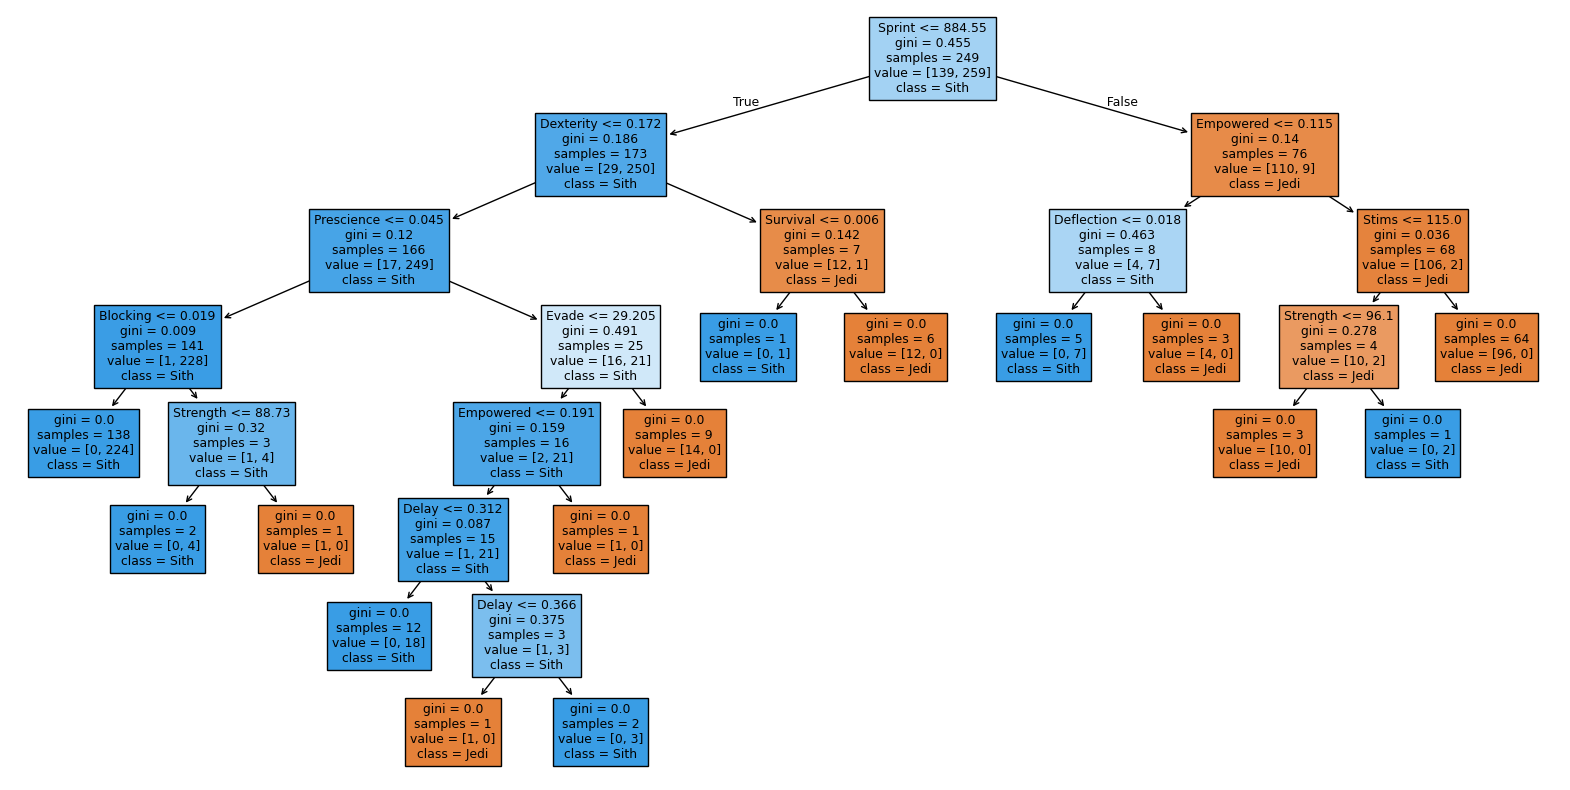

In [7]:
import sys

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Extract data from files
train_df = df_train_knight.copy()
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

valid_df = df_valid_knight.copy()
y_valid = valid_df.iloc[:, -1]
X_valid = valid_df[X_train.columns]

test_df = df_test_knight.copy()
y_test = test_df.iloc[:, -1]
X_test = test_df[X_train.columns]

# Train model
clf = RandomForestClassifier(max_leaf_nodes=19, random_state=8 )
clf.fit(X_train, y_train)

# Predict
y_valid_pred = clf.predict(X_valid)
y_test_pred = clf.predict(X_test)

# Evaluate on validation set
f1 = f1_score(y_valid, y_valid_pred, average='weighted')
print(y_valid_pred)
print("F1 Score:", f1)

# Save predictions to Tree.txt
with open("Tree.txt", "w") as f:
    for value in y_test_pred:
        f.write(f"{value}\n")

print(y_test_pred)

# Display data on plot_tree graph
plt.figure(figsize=(20, 10))
tree.plot_tree(clf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=clf.classes_)
plt.show()

Best k:  1
F1 score for this k:  0.9875


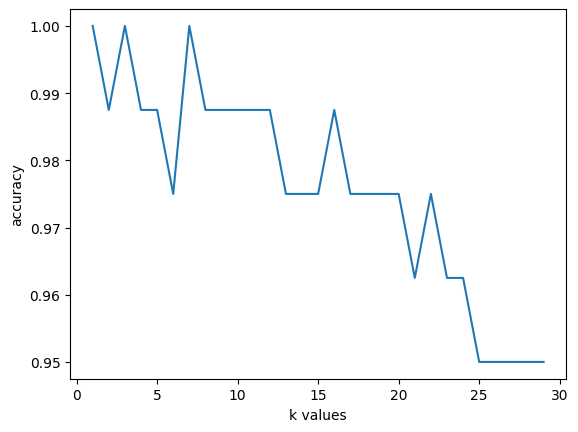

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


# Extract data from files
train_df = df_train_knight.copy()
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

valid_df = df_valid_knight.copy()
y_valid = valid_df.iloc[:, -1]
X_valid = valid_df[X_train.columns]

test_df = df_test_knight.copy()
y_test = test_df.iloc[:, -1]
X_test = test_df[X_train.columns]

# Precision % according to the count of k-value
k_values = range(1, 30)
f1_scores = []
for k in k_values :
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_valid)
            acc = accuracy_score(y_valid, y_pred)
            f1_scores.append(acc)
best_k = k_values[f1_scores.index(max(f1_scores))]
print("Best k: ", best_k)
print("F1 score for this k: ", f1_scores[best_k])
plt.plot(k_values, f1_scores)
plt.ylabel("accuracy")
plt.xlabel("k values")
plt.show()

# Save predictions in a file
k = best_k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

with open("KNN.txt", "w") as f:
        for value in prediction:
            f.write(f"{value}\n")



In [9]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Extract data from files
train_df = df_train_knight.copy()
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

valid_df = df_valid_knight.copy()
y_valid = valid_df.iloc[:, -1]
X_valid = valid_df[X_train.columns]

test_df = df_test_knight.copy()
y_test = test_df.iloc[:, -1]
X_test = test_df[X_train.columns]

# Define classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = LogisticRegression(max_iter=3000)

#Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('knn', clf1),
    ('rf', clf2),
    ('lr', clf3)
], voting='hard')

# Train model
voting_clf.fit(X_train, y_train)

# Evaluate on validation set
y_pred_val = voting_clf.predict(X_valid)
f1 = f1_score(y_valid, y_pred_val, pos_label='Jedi')
print(f"F1-Score on validation set: {f1:.4f}")

# Predict on test data
predictions = voting_clf.predict(X_test)

# Save predictions to Voting.txt
with open("Voting.txt", "w") as f:
    for label in predictions:
        f.write(f"{label}\n")

F1-Score on validation set: 1.0000
